# 1. Library Import

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리


!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정



W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123597 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

# 2. 데이터 불러오기 및 확인

In [3]:
df_hitter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/hitter_salary_debut.csv')

In [4]:
df = df_hitter.drop( ['연도','순위','선수명','팀명'] ,axis=1)


In [5]:
df_pf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HK/kbo_salary/KBO_Salary/pitcher_meanERA_parkfactor.csv')

df_pf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   순위              444 non-null    int64  
 1   선수명             444 non-null    object 
 2   팀명              444 non-null    object 
 3   ERA             444 non-null    float64
 4   G               444 non-null    int64  
 5   W               444 non-null    int64  
 6   L               444 non-null    int64  
 7   SV              444 non-null    int64  
 8   HLD             444 non-null    int64  
 9   WPCT            444 non-null    float64
 10  IP              444 non-null    float64
 11  H               444 non-null    float64
 12  HR              444 non-null    int64  
 13  BB              444 non-null    int64  
 14  HBP             444 non-null    int64  
 15  SO              444 non-null    int64  
 16  R               444 non-null    int64  
 17  ER              444 non-null    int

In [6]:
df_pf = df_pf[['연도','팀명','park_factor']].drop_duplicates().reset_index()

In [7]:
league = {
    '리그평균출루율' : [0.349,0.346,0.333,0.338],
    '리그평균장타율' : [0.409,0.383,0.379,0.374],
    '연도' : [2020, 2021, 2022, 2023]
}

df_league = pd.DataFrame(league)

In [8]:
def calculate_ops_plus(df_hitter):
    slg = df_hitter['SLG'] / (df_league.loc[df_league['연도'] == df_hitter['연도'],'리그평균장타율'].values[0])

    obp = df_hitter['OBP'] / (df_league.loc[df_league['연도'] == df_hitter['연도'],'리그평균출루율'].values[0])
    pf = df_pf.loc[(df_pf['연도']==df_hitter['연도']) & (df_pf['팀명'] == df_hitter['팀명']),'park_factor'].values[0]

    ops_plus = (slg + obp - 1) * 100 / pf
    return ops_plus

df_hitter['OPS+'] = df_hitter.apply(calculate_ops_plus, axis=1)

In [9]:
df.describe()

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,SLG,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉,연차
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,...,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,0.242138,84.489720,275.267290,240.028037,34.022430,64.385047,11.022430,1.022430,5.332710,93.450467,...,0.344854,0.318148,0.663002,16.115888,0.242198,0.214473,25025.663551,1.406336,25481.738318,8.545794
std,0.068091,43.120068,199.317472,173.470656,27.689684,51.973392,9.892278,1.653354,7.004918,78.296427,...,0.112050,0.071765,0.172363,14.922824,0.108728,0.238355,42212.847498,1.920611,37783.821164,5.321258
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2700.000000,-2.480000,3000.000000,1.000000
25%,0.215500,47.000000,85.500000,74.000000,10.000000,17.000000,2.000000,0.000000,0.000000,22.000000,...,0.285500,0.289000,0.590500,3.000000,0.200000,0.000000,3400.000000,-0.040000,4500.000000,4.000000
50%,0.251000,92.000000,258.000000,224.000000,28.000000,54.000000,9.000000,0.000000,3.000000,79.000000,...,0.355000,0.327000,0.684000,12.000000,0.260000,0.182000,7200.000000,0.610000,9000.000000,8.000000
75%,0.284000,123.000000,463.500000,406.000000,53.000000,110.500000,18.000000,1.000000,7.000000,153.500000,...,0.412500,0.362000,0.765500,27.000000,0.305500,0.333000,26000.000000,2.570000,30000.000000,12.000000
max,0.750000,144.000000,651.000000,570.000000,115.000000,192.000000,46.000000,11.000000,35.000000,313.000000,...,1.000000,0.750000,1.750000,59.000000,1.000000,1.000000,270000.000000,7.910000,270000.000000,24.000000


# 3. EDA

In [10]:
df.corr()

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,SLG,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉,연차
AVG,1.000000,0.491600,0.527919,0.531489,0.539856,0.584998,0.534176,0.321527,0.342677,0.561367,...,0.835248,0.846183,0.895292,0.581834,0.553593,0.226074,0.267892,0.525961,0.304485,0.267491
G,0.491600,1.000000,0.924195,0.922525,0.859538,0.883963,0.805955,0.445022,0.575202,0.861784,...,0.491785,0.520230,0.536301,0.828226,0.396298,0.215755,0.422377,0.682182,0.490235,0.462417
PA,0.527919,0.924195,1.000000,0.998334,0.941981,0.980582,0.904257,0.498352,0.661344,0.963712,...,0.549704,0.545380,0.584424,0.948214,0.424989,0.217472,0.513550,0.787018,0.580741,0.457188
AB,0.531489,0.922525,0.998334,1.000000,0.938893,0.983423,0.906140,0.506084,0.656593,0.964887,...,0.550143,0.532736,0.579445,0.951332,0.426099,0.215663,0.506033,0.775762,0.572433,0.451116
R,0.539856,0.859538,0.941981,0.938893,1.000000,0.951464,0.882933,0.570530,0.671097,0.947356,...,0.574341,0.557211,0.605366,0.937351,0.417215,0.236487,0.505537,0.839367,0.579187,0.381505
H,0.584998,0.883963,0.980582,0.983423,0.951464,1.000000,0.926771,0.522293,0.652577,0.978104,...,0.586696,0.568348,0.618035,0.984115,0.450605,0.230970,0.515390,0.827826,0.579776,0.430630
2B,0.534176,0.805955,0.904257,0.906140,0.882933,0.926771,1.000000,0.392009,0.668940,0.937637,...,0.600710,0.527192,0.610009,0.920869,0.420500,0.215324,0.517121,0.785100,0.558320,0.429303
3B,0.321527,0.445022,0.498352,0.506084,0.570530,0.522293,0.392009,1.000000,0.121756,0.471140,...,0.262301,0.278236,0.286362,0.509867,0.220893,0.139580,0.123584,0.495458,0.241643,0.027767
HR,0.342677,0.575202,0.661344,0.656593,0.671097,0.652577,0.668940,0.121756,1.000000,0.791241,...,0.627253,0.377284,0.564849,0.641632,0.283751,0.211814,0.548539,0.639106,0.612406,0.408235
TB,0.561367,0.861784,0.963712,0.964887,0.947356,0.978104,0.937637,0.471140,0.791241,1.000000,...,0.644779,0.556893,0.651024,0.963352,0.437728,0.243269,0.559900,0.841167,0.629972,0.450836


<Axes: >

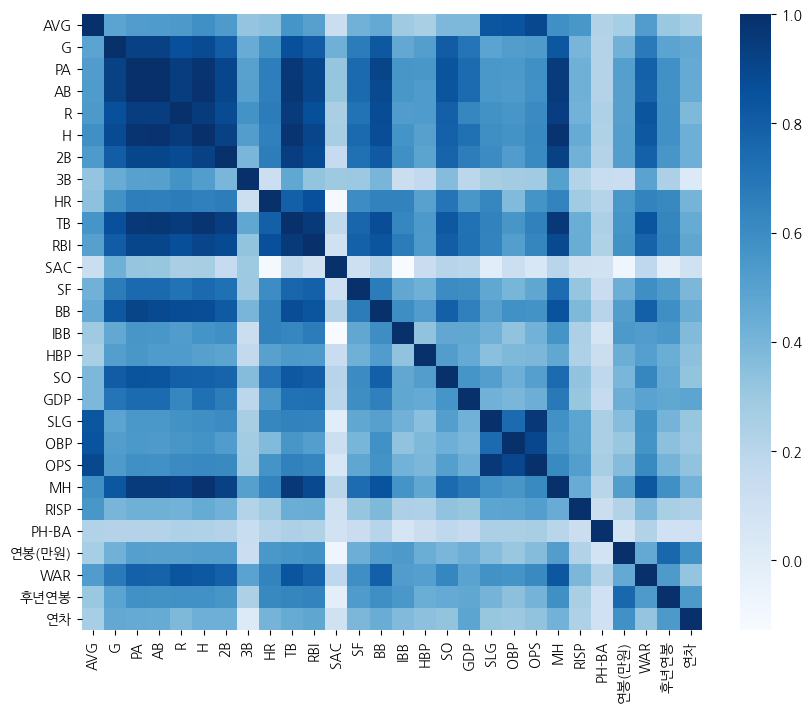

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Blues')

<Axes: >

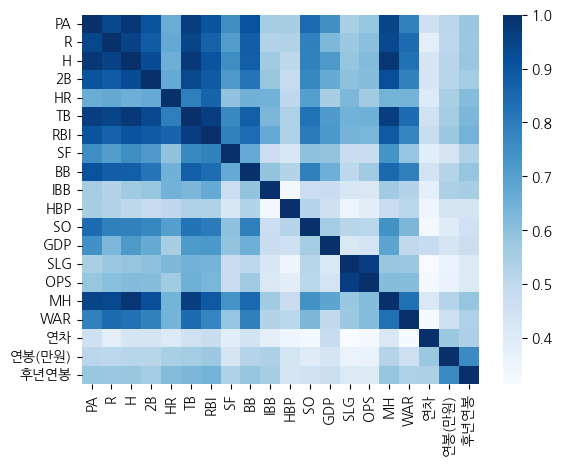

In [12]:
df_corr = df[['PA','R','H','2B','HR','TB','RBI','SF','BB','IBB','HBP','SO','GDP','SLG','OPS','MH','WAR','연차','연봉(만원)','후년연봉']]
sns.heatmap(df_corr.corr(),cmap='Blues')

# 4. 모델링

In [13]:
df.describe()

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,SLG,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉,연차
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,...,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000
mean,0.242138,84.489720,275.267290,240.028037,34.022430,64.385047,11.022430,1.022430,5.332710,93.450467,...,0.344854,0.318148,0.663002,16.115888,0.242198,0.214473,25025.663551,1.406336,25481.738318,8.545794
std,0.068091,43.120068,199.317472,173.470656,27.689684,51.973392,9.892278,1.653354,7.004918,78.296427,...,0.112050,0.071765,0.172363,14.922824,0.108728,0.238355,42212.847498,1.920611,37783.821164,5.321258
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2700.000000,-2.480000,3000.000000,1.000000
25%,0.215500,47.000000,85.500000,74.000000,10.000000,17.000000,2.000000,0.000000,0.000000,22.000000,...,0.285500,0.289000,0.590500,3.000000,0.200000,0.000000,3400.000000,-0.040000,4500.000000,4.000000
50%,0.251000,92.000000,258.000000,224.000000,28.000000,54.000000,9.000000,0.000000,3.000000,79.000000,...,0.355000,0.327000,0.684000,12.000000,0.260000,0.182000,7200.000000,0.610000,9000.000000,8.000000
75%,0.284000,123.000000,463.500000,406.000000,53.000000,110.500000,18.000000,1.000000,7.000000,153.500000,...,0.412500,0.362000,0.765500,27.000000,0.305500,0.333000,26000.000000,2.570000,30000.000000,12.000000
max,0.750000,144.000000,651.000000,570.000000,115.000000,192.000000,46.000000,11.000000,35.000000,313.000000,...,1.000000,0.750000,1.750000,59.000000,1.000000,1.000000,270000.000000,7.910000,270000.000000,24.000000


# 3. EDA

In [14]:
df.corr()

,AVG,G,PA,AB,R,H,2B,3B,HR,TB,...,SLG,OBP,OPS,MH,RISP,PH-BA,연봉(만원),WAR,후년연봉,연차
AVG,1.000000,0.491600,0.527919,0.531489,0.539856,0.584998,0.534176,0.321527,0.342677,0.561367,...,0.835248,0.846183,0.895292,0.581834,0.553593,0.226074,0.267892,0.525961,0.304485,0.267491
G,0.491600,1.000000,0.924195,0.922525,0.859538,0.883963,0.805955,0.445022,0.575202,0.861784,...,0.491785,0.520230,0.536301,0.828226,0.396298,0.215755,0.422377,0.682182,0.490235,0.462417
PA,0.527919,0.924195,1.000000,0.998334,0.941981,0.980582,0.904257,0.498352,0.661344,0.963712,...,0.549704,0.545380,0.584424,0.948214,0.424989,0.217472,0.513550,0.787018,0.580741,0.457188
AB,0.531489,0.922525,0.998334,1.000000,0.938893,0.983423,0.906140,0.506084,0.656593,0.964887,...,0.550143,0.532736,0.579445,0.951332,0.426099,0.215663,0.506033,0.775762,0.572433,0.451116
R,0.539856,0.859538,0.941981,0.938893,1.000000,0.951464,0.882933,0.570530,0.671097,0.947356,...,0.574341,0.557211,0.605366,0.937351,0.417215,0.236487,0.505537,0.839367,0.579187,0.381505
H,0.584998,0.883963,0.980582,0.983423,0.951464,1.000000,0.926771,0.522293,0.652577,0.978104,...,0.586696,0.568348,0.618035,0.984115,0.450605,0.230970,0.515390,0.827826,0.579776,0.430630
2B,0.534176,0.805955,0.904257,0.906140,0.882933,0.926771,1.000000,0.392009,0.668940,0.937637,...,0.600710,0.527192,0.610009,0.920869,0.420500,0.215324,0.517121,0.785100,0.558320,0.429303
3B,0.321527,0.445022,0.498352,0.506084,0.570530,0.522293,0.392009,1.000000,0.121756,0.471140,...,0.262301,0.278236,0.286362,0.509867,0.220893,0.139580,0.123584,0.495458,0.241643,0.027767
HR,0.342677,0.575202,0.661344,0.656593,0.671097,0.652577,0.668940,0.121756,1.000000,0.791241,...,0.627253,0.377284,0.564849,0.641632,0.283751,0.211814,0.548539,0.639106,0.612406,0.408235
TB,0.561367,0.861784,0.963712,0.964887,0.947356,0.978104,0.937637,0.471140,0.791241,1.000000,...,0.644779,0.556893,0.651024,0.963352,0.437728,0.243269,0.559900,0.841167,0.629972,0.450836


<Axes: >

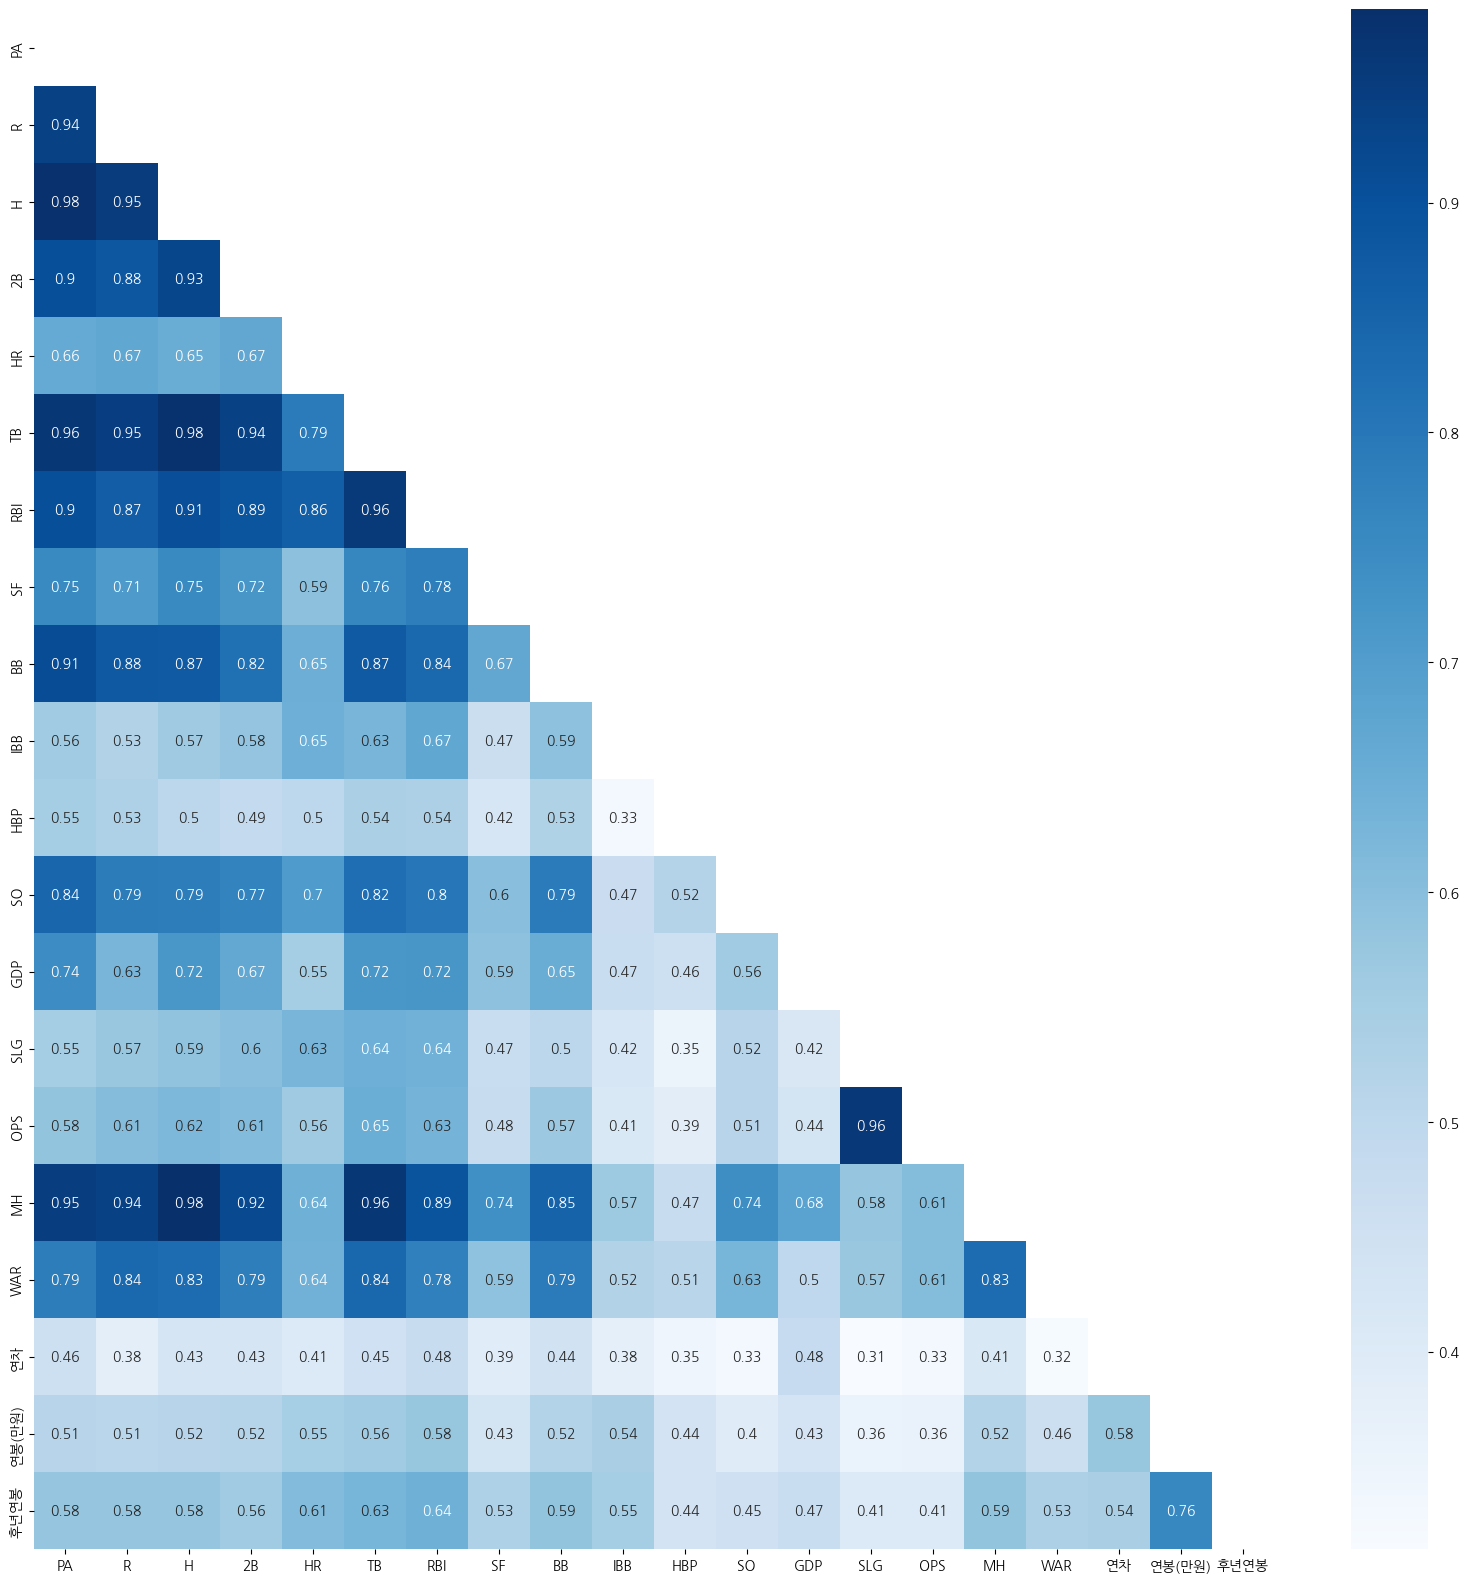

In [15]:
import numpy as np

plt.figure(figsize=(20,20))

df_corr = df[['PA','R','H','2B','HR','TB','RBI','SF','BB','IBB','HBP','SO','GDP','SLG','OPS','MH','WAR','연차','연봉(만원)','후년연봉']].corr()

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.triu(df_corr)

sns.heatmap(df_corr,
            cmap='Blues',
            annot=True,
            mask=mask, )

# 4. 모델링

## 4.1연봉 구간으로 나눠서 분류 모델링

In [16]:
df_hitter['후년연봉'].describe()

,후년연봉
count,535.000000
mean,25481.738318
std,37783.821164
min,3000.000000
25%,4500.000000
50%,9000.000000
75%,30000.000000
max,270000.000000


In [17]:
def assign_salary_range(row):
  if row < 4500:
    return 0
  elif row < 9000:
    return 1
  elif row < 30000:
    return 2
  else:
    return 3

df_hitter['연봉구간'] = df_hitter['후년연봉'].apply(assign_salary_range)
df_hitter['현재연봉구간'] = df_hitter['연봉(만원)'].apply(assign_salary_range)


In [18]:
df_hitter['연봉구간'].value_counts()

,count
연봉구간,
3,137
2,137
1,134
0,127


In [20]:
data = df_hitter[['OPS+','H','2B','3B','HR','HBP','TB','BB','SLG','OBP','연차']]
data = df_hitter[['PA','R','H','2B','HR','TB','RBI','SF','BB','IBB','HBP','GDP','SLG','OPS','OPS+','MH','WAR','연차']]
# PA , R, H, 2B, RBI, BB, 연차
target = df_hitter['연봉구간']
data.columns.tolist()

['PA',
 'R',
 'H',
 '2B',
 'HR',
 'TB',
 'RBI',
 'SF',
 'BB',
 'IBB',
 'HBP',
 'GDP',
 'SLG',
 'OPS',
 'OPS+',
 'MH',
 'WAR',
 '연차']

## **RandomForestClassifier feature importances**

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(data, target)

importances = rf_clf.feature_importances_

# Series로 만들어 인덱스를 붙인다
imp = pd.Series(importances, index=data.columns)

# 내림차순 정렬
top15 = imp.sort_values(ascending=False)[:15]
print(top15)

연차      0.121439
TB      0.105240
PA      0.103529
MH      0.087565
H       0.086171
RBI     0.071278
R       0.056528
BB      0.055024
WAR     0.042693
SLG     0.038657
OPS+    0.038142
2B      0.036509
OPS     0.033764
GDP     0.030302
HBP     0.026595
dtype: float64


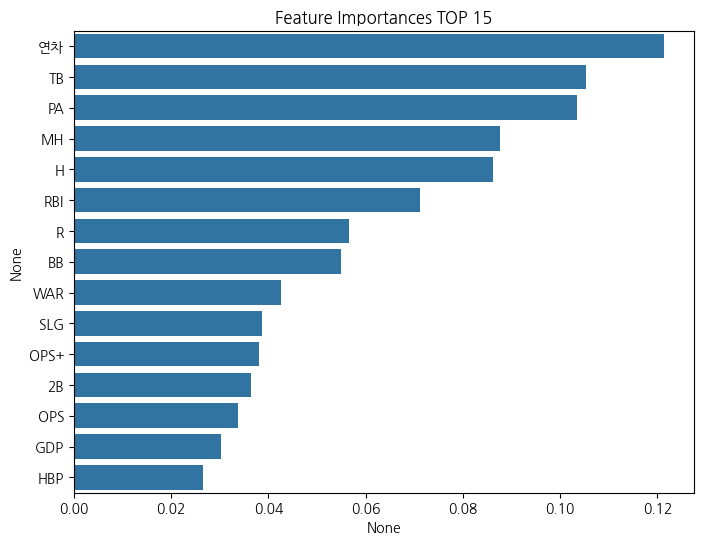

In [24]:
plt.figure(figsize=(8,6))
plt.title('Feature Importances TOP 15')
sns.barplot(x=top15, y=top15.index)
plt.show()

In [25]:
top15.index

Index(['연차', 'TB', 'PA', 'MH', 'H', 'RBI', 'R', 'BB', 'WAR', 'SLG', 'OPS+',
       '2B', 'OPS', 'GDP', 'HBP'],
      dtype='object')

In [35]:
from sklearn.model_selection import train_test_split

# data = df_hitter[['H','HBP','OBP','연차','현재연봉구간']]
# data = df_hitter[['OPS+','WAR','BB','HBP','연차','현재연봉구간']]
data = df_hitter[['연차',  'BB', 'WAR', 'OPS+','2B', 'GDP', 'HBP','현재연봉구간']]


target = df_hitter['연봉구간']

X_train, X_test, y_train, y_test = train_test_split(
    data,
    target,
    test_size=0.3,
    random_state=0
)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyBIF(X):
  vif = pd.DataFrame()
  vif['VIF_Factor'] = [variance_inflation_factor(X.values, i)
                        for i in range(X.shape[1])]
  vif['Feature'] = X.columns
  return vif


vif = feature_engineering_XbyBIF(X_train)

print(vif)

   VIF_Factor Feature
0    6.721734      연차
1   10.074885      BB
2    5.282199     WAR
3    5.257500    OPS+
4    9.633482      2B
5    4.961091     GDP
6    2.570085     HBP
7    7.964663  현재연봉구간


In [37]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train,y_train)

RandomForestClassifier()

In [38]:
from sklearn.metrics import accuracy_score

# test 데이터 예측
y_pred = model.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy : {accuracy}")

Accuracy : 0.8385093167701864


In [ ]:
y_pred

array([3, 3, 3, 0, 3, 3, 3, 1, 3, 1, 2, 2, 3, 3, 3, 3, 1, 0, 1, 0, 2, 3,
       2, 3, 3, 0, 3, 2, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 3, 3, 1, 0, 2, 3,
       2, 2, 3, 3, 0, 3, 1, 2, 0, 1, 2, 2, 1, 2, 0, 3, 2, 2, 0, 2, 3, 3,
       1, 2, 3, 2, 3, 3, 1, 0, 1, 0, 0, 1, 3, 2, 0, 3, 1, 1, 0, 1, 3, 2,
       1, 0, 1, 2, 3, 3, 3, 0, 2, 2, 3, 2, 3, 3, 1, 0, 3, 2, 3, 2, 3, 0,
       0, 3, 2, 1, 0, 2, 3, 0, 0, 2, 0, 3, 1, 1, 2, 3, 3, 1, 2, 1, 3, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 3, 0, 3,
       3, 1, 0, 0, 1, 2, 3])

In [39]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
params = {
    'n_estimators': [300,400,500,700,1000],  # 생성할 결정 트리 개수 ( 10, 100, 300 돌렸을 때 300 나와서 크기 늘려서 다시 진행 )
    'max_depth': [6, 8, 10, 12],             # 각 트리의 최대 깊이
    'min_samples_leaf': [8, 12, 18],         # 리프 노드가 되기 위한 최소 샘플 수
    'min_samples_split': [8, 16, 20,24]      # 내부 노드를 분할하기 위한 최소 샘플 수
}

# RandomForestClassifier 객체 생성 (random_state로 결과 재현 가능, n_jobs로 병렬 처리)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# GridSearchCV 객체 생성 (cv로 교차 검증의 fold 수 설정)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)

# 학습 데이터로 GridSearchCV 실행 (최적의 하이퍼파라미터 탐색)
grid_cv.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

# 최고 예측 정확도 출력
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))


최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 500}
최고 예측 정확도: 0.8155


In [ ]:
data = df_hitter[['H','OBP','연차','HBP','현재연봉구간']]

h_input =

## **RandomForestClassifier는 데이터 스케일링의 영향을 덜 받는 모델이라고 한다. 한 번 확인해볼까?**

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(scaled_train,y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score

# test 데이터 예측
y_pred = model.predict(scaled_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy : {accuracy}")

Accuracy : 0.7950310559006211


In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
params = {
    'n_estimators': [10, 100,300,400],  # 생성할 트리의 개수
    'max_depth': [6, 8, 10, 12],  # 각 트리의 최대 깊이
    'min_samples_leaf': [8, 12, 18],  # 리프 노드가 되기 위한 최소 샘플 수
    'min_samples_split': [8, 16, 20,24]  # 내부 노드를 분할하기 위한 최소 샘플 수
}

# RandomForestClassifier 객체 생성 (random_state로 결과 재현 가능, n_jobs로 병렬 처리)
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

# GridSearchCV 객체 생성 (cv로 교차 검증의 fold 수 설정)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)

# 학습 데이터로 GridSearchCV 실행 (최적의 하이퍼파라미터 탐색)
grid_cv.fit(scaled_train, y_train)

# 최적의 하이퍼파라미터 출력
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

# 최고 예측 정확도 출력
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))


최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}
최고 예측 정확도: 0.8423
